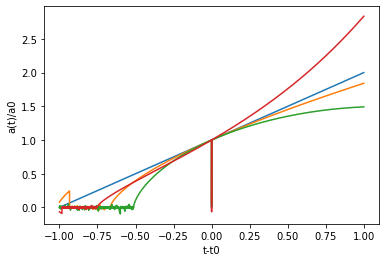

In [51]:
import numpy as np
import math
import matplotlib.pyplot as plt
plt.ion()

omega_m = np.array([0.0,1.0,3.0,0.23])
omega_l = np.array([0.0,0.0,0.0,0.73])

N = 10000
H0 = 1.0

t_back = np.linspace(-1,0,N+1)
t_forw = np.linspace(0,1,N+1)
dt = t_forw[3] - t_forw[2]
a_forw = np.zeros(N+1)
a_back = np.zeros(N+1)
a_back[N] = 1.0
a_forw[0] = 1.0


def solve_f(m, l):
    for i in range(0,N):
        ff = (m/(a_forw[i]**3)) + (l) + ((1-m)/(a_forw[i]**2))
        a = a_forw[i] + dt*a_forw[i]*H0*math.sqrt(abs(ff))
        fa = (m/(a**3)) + (l) + ((1-m)/(a**2))
        if(fa and ff >=0):
            a = a_forw[i] + dt*a_forw[i]*H0*math.sqrt(abs(ff))
            a_forw[i+1] = a_forw[i] + 0.5*dt*(a_forw[i]*H0*math.sqrt(abs(ff)) + a*H0*math.sqrt(abs(fa)))
        else:
            a = a_forw[i] - dt*a_forw[i]*H0*math.sqrt(abs(ff))
            a_forw[i+1] = a_forw[i] - 0.5*dt*(a_forw[i]*H0*math.sqrt(abs(ff)) + a*H0*math.sqrt(abs(fa)))
        
def solve_b(m, l):
    for i in range(N,-1,-1):
        bb = (m/(a_back[i]**3)) + (l) + ((1-m)/(a_back[i]**2))
        a = a_back[i] - dt*a_back[i]*H0*(math.sqrt(abs(bb)))
        ba = (m/(a**3)) + (l) + ((1-m)/(a**2))
    
        a_back[i-1] = a_back[i] - 0.5*dt*(a_back[i]*H0*math.sqrt(abs(bb)) + a*H0*math.sqrt(abs(ba)))
        
        
for i in range(0,4):
    a_forw = np.zeros(N+1)
    a_back = np.zeros(N+1)
    a_back[N] = 1.0
    a_forw[0] = 1.0
    
    solve_f(omega_m[i], omega_l[i])
    solve_b(omega_m[i], omega_l[i])

    x = np.concatenate([t_back,t_forw])
    y = np.concatenate([a_back,a_forw])
    plt.plot(x,y)
    plt.xlabel("t-t0")
    plt.ylabel("a(t)/a0")
    #plt.xlim([-0.25,0.25])
    #plt.ylim([0.8,1.3])


## Problem 1.1 

In [ ]:
Omega_M =
Omega_T = 
Omega_L = 
